<a href="https://colab.research.google.com/github/HuyKhoi-code/fruits/blob/master/20x20_sctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import os 
import cv2
import glob
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io

In [2]:
def clustering_image(img):
  #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image, center

In [3]:
def remove_light_color(img, center_color):
  light_color = max(sum(center_color[0]), sum(center_color[1]))
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if sum(img[x][y]) == light_color:
        img[x][y][0]=0
        img[x][y][1]=0
        img[x][y][2]=0
  return img

In [4]:
def Canny_Detect(img):
    edge = cv2.Canny (img, 70, 50)
    return edge

cachua


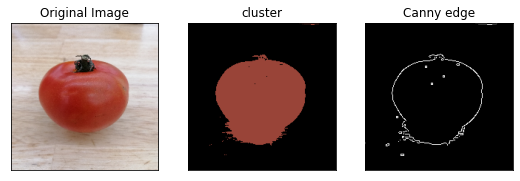

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
cam


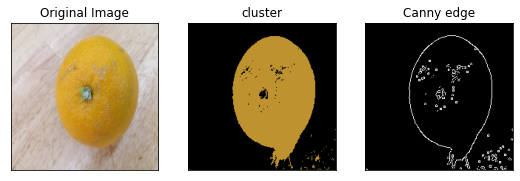

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0 255   0 ...   0   0   0]]
chuoi


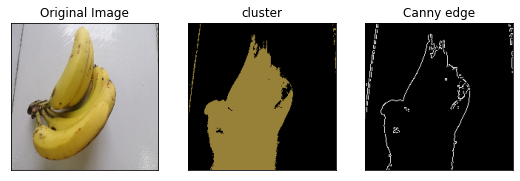

[[  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
duahau


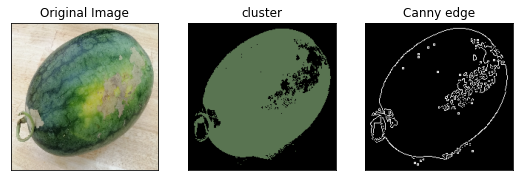

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
le


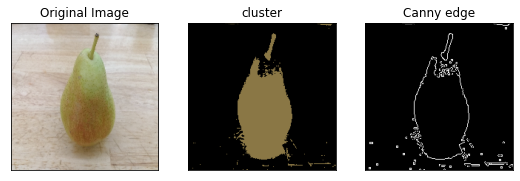

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
nho


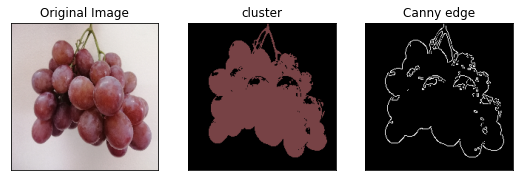

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
quyt


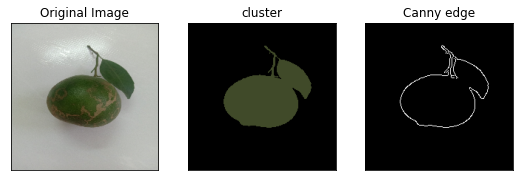

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
tao


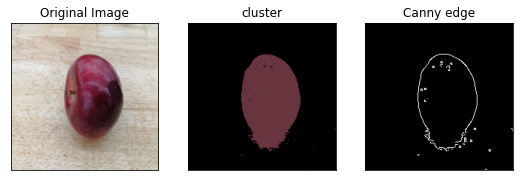

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
thom


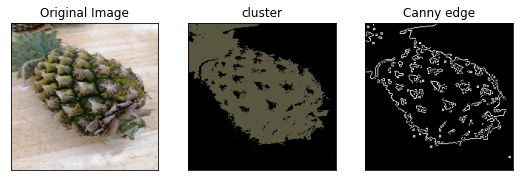

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
xoai


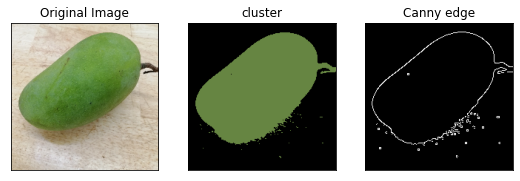

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [19]:
f_name = ['cachua', 'cam', 'chuoi', 'duahau', 'le', 'nho', 'quyt', 'tao', 'thom', 'xoai']
for name in f_name:
    img = cv2.imread ("/content/drive/My Drive/Fruit recognition/data/"+ name + "/" + name + "_1.jpg")
    print (name)
    resized = cv2.resize(img, (200, 200))
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    image, center = clustering_image(resized )
    image = remove_light_color(image, center)

    edge = Canny_Detect(image)

    figure_size = 9
    plt.figure(figsize=(figure_size,figure_size))

    plt.subplot(1,3,1)
    plt.imshow(resized)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.title('cluster'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,3,3)
    plt.imshow(edge, cmap='gray')
    plt.title('Canny edge'), plt.xticks([]), plt.yticks([])

    plt.show()
    print (edge)
print ()

done 250 image


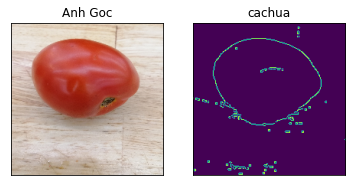

done 250 image


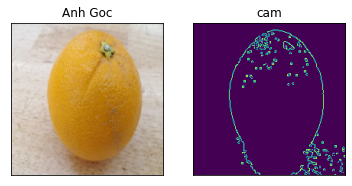

done 250 image


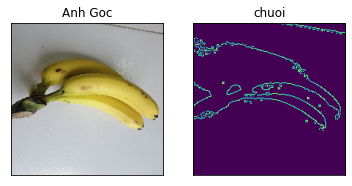

done 250 image


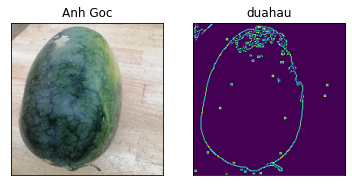

done 250 image


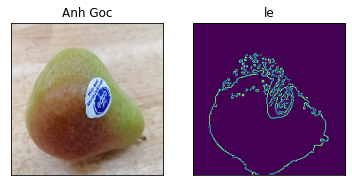

done 250 image


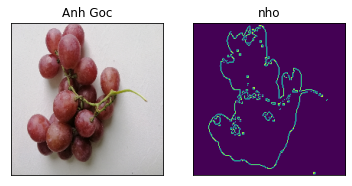

done 250 image


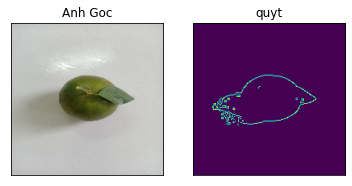

done 250 image


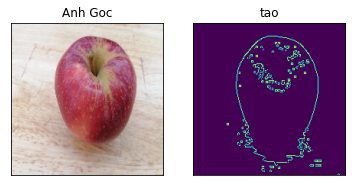

done 250 image


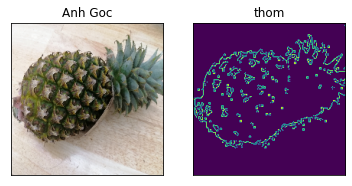

done 250 image


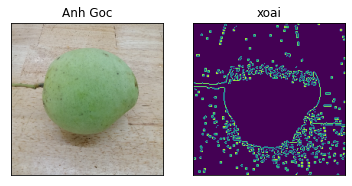

In [8]:
path = '/content/drive/My Drive/Fruit recognition/data'
name_fruits = ['cachua', 'cam', 'chuoi', 'duahau', 'le', 'nho', 'quyt', 'tao', 'thom', 'xoai']
dataset_train = {}
dataset_test = {}
test_size = 0.25
number = 1
dim = (200, 200)

for name in name_fruits:
  index = 0
  images_train = []
  images_test = []
  while index < 250:
    img_path = path+'/'+name+'/'+name+'_'+str(index)+'.jpg'
    
    #print(img_path)
    fruit_img = cv2.imread(img_path)
    fruit_img = cv2.resize(fruit_img, dim)
    fruit_img = cv2.cvtColor(fruit_img,cv2.COLOR_BGR2RGB)

    cluster, center = clustering_image(fruit_img )
    image = remove_light_color(cluster, center)
    
    edge = Canny_Detect(image)

    if len(images_test) < test_size*(len(os.listdir(path+'/'+name))):
      images_test.append(edge)
    else:
      images_train.append(edge)
    if index == 249:
      print('done {} image'.format(index + 1))
      figure_size = 6
      plt.figure(figsize=(figure_size,figure_size))
      plt.subplot(1,2,1),plt.imshow(fruit_img)
      plt.title('Anh Goc'), plt.xticks([]), plt.yticks([])
      plt.subplot(1,2,2),plt.imshow(edge)
      plt.title(name), plt.xticks([]), plt.yticks([])
      
      plt.show()
      
    index+=1
  dataset_train[name] = images_train
  dataset_test[name] = images_test

In [10]:
def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 20):
        for x in range(0, img.shape[1], 20):
            
            # Cropping the image into a section.
            section_img = img[y:y+20, x:x+20]
            
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

In [13]:
all_imgs = np.zeros((1, 200), dtype='uint8')

progress_counter = 0
name = []
section_mean = []
section_std = []
for fruits in dataset_train: 
    for img in dataset_train[fruits]:


        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name.append (fruits)

all_imgs = all_imgs[1:]

In [14]:
feature_name = []
section = 1
for y in range(0, 200, 20):
    for x in range(0, 200, 20):
        feature_name.append(f"sec{section}_mean")
        feature_name.append(f"sec{section}_std")
        section += 1

In [15]:
ftb_train = pd.DataFrame(all_imgs, columns= feature_name)
print (ftb_train.shape)
name_col = name
ftb_train.insert(loc = 0, column = "name", value= name_col)
ftb_train.head(200)

(1870, 200)


,name,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,...,sec81_mean,sec81_std,sec82_mean,sec82_std,sec83_mean,sec83_std,sec84_mean,sec84_std,sec85_mean,sec85_std,sec86_mean,sec86_std,sec87_mean,sec87_std,sec88_mean,sec88_std,sec89_mean,sec89_std,sec90_mean,sec90_std,sec91_mean,sec91_std,sec92_mean,sec92_std,sec93_mean,sec93_std,sec94_mean,sec94_std,sec95_mean,sec95_std,sec96_mean,sec96_std,sec97_mean,sec97_std,sec98_mean,sec98_std,sec99_mean,sec99_std,sec100_mean,sec100_std
0,cachua,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,7.0125,41.701467,16.575,62.864094,0.000,0.000000,0.0000,0.000000,0.0,0.0,0.0,...,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,7.0125,41.701467,22.3125,72.054423,7.6500,43.499741,16.5750,62.864094,0.000,0.000000,0.0000,0.00000,0.0000,0.00000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,2.5500,25.372180,7.0125,41.701467,0.0000,0.000000,0.0,0.000000,0.000,0.000000,0.0000,0.000000
1,cachua,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,16.575,62.864094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4625,33.43686,12.7500,55.575962,12.750,55.575962,12.750,55.575962,0.6375,12.734053,0.0,0.0,0.0,...,0.0000,0.000000,7.0125,41.701467,25.5000,76.500000,14.6625,59.362855,59.9250,108.119699,31.8750,84.333323,7.0125,41.701467,0.000,0.000000,0.0000,0.00000,0.0000,0.00000,1.9125,22.000678,7.6500,43.499741,26.7750,78.171122,33.1500,85.757376,57.3750,106.483493,16.5750,62.864094,0.0000,0.000000,10.2,49.969591,0.000,0.000000,0.0000,0.000000
2,cachua,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0000,0.000000,0.000,0.000000,0.000,0.000000,0.0000,0.000000,0.0,0.0,0.0,...,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,2.5500,25.372180,5.7375,37.817239,13.3875,56.873433,0.0000,0.000000,0.000,0.000000,0.0000,0.00000,0.0000,0.00000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0,0.000000,0.000,0.000000,0.0000,0.000000
3,cachua,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0000,0.000000,0.000,0.000000,0.000,0.000000,0.0000,0.000000,0.0,0.0,0.0,...,3.8250,30.995877,5.1000,35.700000,10.8375,51.440364,14.0250,58.134967,0.0000,0.000000,13.3875,56.873433,20.4000,69.179766,0.000,0.000000,0.0000,0.00000,0.0000,0.00000,13.3875,56.873433,5.7375,37.817239,1.2750,17.986088,8.2875,45.217583,13.3875,56.873433,14.0250,58.134967,0.0000,0.000000,0.0,0.000000,0.000,0.000000,0.0000,0.000000
4,cachua,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,4.4625,33.436860,22.950,72.976349,16.575,62.864094,0.0000,0.000000,0.0,0.0,0.0,...,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,23.5875,73.881272,1.9125,22.000678,12.7500,55.575962,8.925,46.863839,0.0000,0.00000,5.1000,35.70000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.6375,12.734053,15.9375,61.725672,5.1000,35.700000,0.0,0.000000,3.825,30.995877,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,cam,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0

In [16]:
all_imgs = np.zeros((1, 200), dtype='uint8')

progress_counter = 0
name_test = []
section_mean = []
section_std = []
for fruits in dataset_test: 
    for img in dataset_test[fruits]:


        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name_test.append (fruits)

all_imgs = all_imgs[1:]

In [17]:
ftb_test = pd.DataFrame(all_imgs, columns= feature_name)
print (ftb_test.shape)
name_col = name_test
ftb_test.insert(loc = 0, column = "name", value= name_col)
ftb_test.head(200)

(630, 200)


,name,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,...,sec81_mean,sec81_std,sec82_mean,sec82_std,sec83_mean,sec83_std,sec84_mean,sec84_std,sec85_mean,sec85_std,sec86_mean,sec86_std,sec87_mean,sec87_std,sec88_mean,sec88_std,sec89_mean,sec89_std,sec90_mean,sec90_std,sec91_mean,sec91_std,sec92_mean,sec92_std,sec93_mean,sec93_std,sec94_mean,sec94_std,sec95_mean,sec95_std,sec96_mean,sec96_std,sec97_mean,sec97_std,sec98_mean,sec98_std,sec99_mean,sec99_std,sec100_mean,sec100_std
0,cachua,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,1.9125,22.000678,1.275,17.986088,5.1000,35.700000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,21.6750,71.114832,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,...,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,7.6500,43.499741,12.7500,55.575962,14.0250,58.134967,15.3000,60.559145,5.1000,35.700000,0.0000,0.000000,0.0000,0.000000,1.9125,22.000678,0.0000,0.000000,12.1125,54.239975,11.4750,52.862552,25.5000,76.500000,8.9250,46.863839,0.0000,0.000000,5.1000,35.700000,0.0000,0.000000,0.0000,0.000000
1,cachua,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,8.2875,45.217583,13.3875,56.873433,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,...,1.9125,22.000678,7.6500,43.499741,5.1000,35.700000,13.3875,56.873433,12.7500,55.575962,14.6625,59.362855,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,3.1875,28.331120,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000
2,cachua,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,15.9375,61.725672,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,...,0.0000,0.000000,0.0000,0.000000,12.1125,54.239975,20.4000,69.179766,15.9375,61.725672,28.0500,79.786888,40.1625,92.889241,0.0000,0.000000,5.1000,35.700000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,5.7375,37.817239,3.8250,30.995877,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000
3,cachua,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,1.2750,17.986088,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,...,20.4000,69.179766,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,14.0250,58.134967,25.5000,76.500000,1.9125,22.000678,33.1500,85.757376,8.2875,45.217583,49.7250,101.031180,2.5500,25.372180,1.9125,22.000678,0.0000,0.000000,0.0000,0.000000,5.1000,35.700000,9.5625,48.445806,22.9500,72.976349,23.5875,73.881272,28.0500,79.786888
4,cachua,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,...,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,8.2875,45.217583,10.8375,51.440364,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,3.1875

In [18]:
ftb_train.to_csv("/content/drive/My Drive/Fruit recognition/output_input/20x20_train.csv", index = False)
ftb_test.to_csv("/content/drive/My Drive/Fruit recognition/output_input/20x20_test.csv", index = False)